## Class 5

### Exercise 22

The Acceptance-rejection algorithm is a method of generating a random distribution from two seperate probability distribution functions **(PDF)** $f$ and $g$. If we know how to generate random variables from the function g and want to generate from f, this is the method to use. 

We have to ensure we find a constant $c$ so that it satisfies the rules:

$f(x) \leq c*g(x)$ for $ x \in \mathbb{R}$

Once the above condition is satisfied, (which basically means for all values of x, g(x) will always be larger than f(x) in a "scaled up version"  as shown further down) we can start sampling values and checking if they satisfy the acceptance-rejection portion of the algorithm

$$U\leq \frac{f(x)}{c*g(x)}$$

1. We generate a random variable from the funciton we know how to generate from/are familiar with $g(x)$. *(We calculate $c * g(x)$)*



2. We then generate a random uniform variable/probability U 

$U\sim Unif(0,1)$

and check it against the criteria we have above. If the expression is True, then we accept the value of x. 

1. Sample $X^* \sim g(x)$ and $U \sim Unif(0,1)$
2. Accept $X = X^*$ if $U \leq \frac{f(X^*)}{c*g(X^*)}$ Otherwise return to 1)

Note: We can check the probability of acceptance by using the constant c:

$$\frac{1}{c}$$ The probability that the value generated will be accepted. If we calculate the reciprocal of this value and multiply it by the sample amount we want, it will provide a rough estimate of how many total samples will be needed to be generated before we reach that value.

Questions:
1. How does this work? I understand that visually the distribution will always be greater and hence, when we obtain values from $c*g(x)$ it has a chance of generating values that dont represent the distribution we want random variables from, but why are we using the Uniform distribution to choose whether values are accepted or not, cant we just see if the values fall under the desired distribution?

The ratio of both $f$ and $g$ is bound by:

$$0 \leq \frac{f(x)}{c*g(x)} \leq 1$$



Which means we are just taking it to chance that we accept the value itself. Im not sure I understand why we let it down to a uniform random variable to be the deciding factor of accepting a value.

**update:

My understanding now, is that to ensure that this sequence of values is random, we randomly have access to these values and ensuring they are selected from random introduces another form of "chaos" that provides more brownian motion within the samples. I think this is wrong as this is where we check the values themselves fall under the correct distribution.

### Exercise 23

1. Find the PDF of both the standard normal distribution X, and normal distribution Y.

2. calculate $\frac{f(x)}{g(x)} \leq c$ so it is true for all values of X.

The part above is deriving the value of C from the expression 

3. Utilize a random uniform distribution to generate U $$U \sim Unif(0,1)$$

4. Sample from the X distribution and check the value against a randomly generated U in the criteria:

$$U\leq \frac{f(x)}{c*g(x)}$$

5. Accept or reject based on the value, Repeat steps until you obtain correct sample size. This should have a $\frac{1}{c}$ acceptance rate on the samples. Meaning calculating the reciprical of that multiplied by the desired sample size provides you with how many sampesl you will roughtly need to generate from U and X to obtain your size.


#### Corrected answer below

While the answer above would work, we want to ensure that we work it out easily only using those values of mu, and the standard deviation.

While the standard normal distribution is just $X\sim Norm(0,1)$ and the other normal distribition

### Exercise 24

We need both PDFS to generate random numbers, Hence lets obtain the PDF for both the standard normal distribution and the doubly exponential distribution.

The probability density function for standard normal distributions is:

$$ f(x) = \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}$$

The probability density function for the double exponential distribution is:

$$ g(x) = \frac{e^{-|x|}}{2}$$


Lets Calculate c, by:

$$\frac{f(x)}{g(x)} \leq c$$

$$\frac{f(x)}{g(x)} = $$



In [95]:
def f(x): #Normal
    return np.exp(-0.5*(x**2)) / np.sqrt(2 * math.pi)
    
def g(x): #Exponential
    return np.exp(-np.abs(x))/2
    

In [116]:
mu = 2
sample_size = 10_000
counter = 0
U = np.random.random()
X = np.random.standard_normal(size=sample_size)
Y=np.random.exponential(size=sample_size,scale=1/mu)




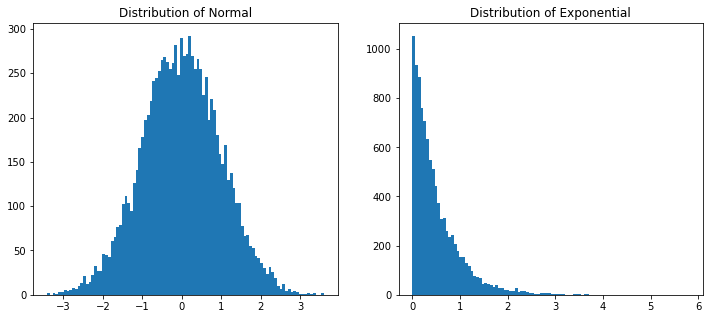

In [122]:
fig,ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].set_title("Distribution of Normal")
ax[0].hist(X,bins=100)
ax[1].set_title("Distribution of Exponential");
ax[1].hist(Y,bins=100);


### Exercise 25

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)
    
def targetFib(k):
    array =[]
    
    for i in range(k,-1,-1):
        value = fib(i)
        if(value <= k):
            array.append(value)
    return array

In [ ]:
targetFib(1000)

### Exercise 26

In [6]:
sample_size = 10_000

In [7]:
U1= np.random.random(size=sample_size //2)
U2= np.random.random(size=sample_size //2)

R = -2*np.log(U1)
theta = 2*math.pi*(U2)

In [10]:
X1 = np.sqrt(R) * np.cos(theta)
X2 = np.sqrt(R) * np.sin(theta)

samples = np.concatenate((X1,X2))

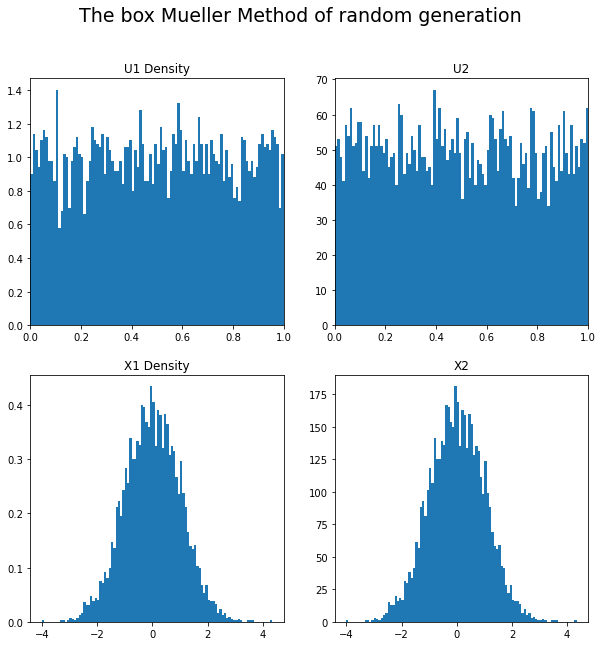

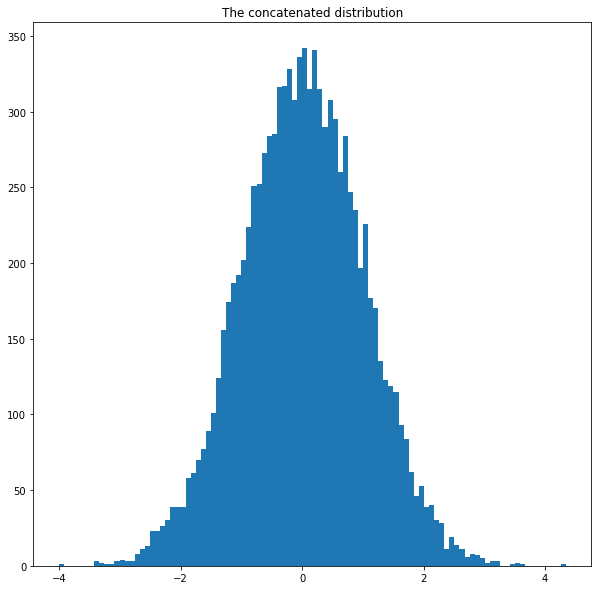

In [16]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax[0][0].set_title("U1 Density")
ax[0][0].hist(U1,bins=100,density=True)
ax[0][0].set_xlim(0,1)

ax[0][1].set_title("U2")
ax[0][1].hist(U2,bins=100)
ax[0][1].set_xlim(0,1)


ax[1][0].set_title("X1 Density")
ax[1][0].hist(X1,bins=100,density=True)

ax[1][1].set_title("X2")
ax[1][1].hist(X1,bins=100);

fig.suptitle("The box Mueller Method of random generation",fontsize=19);

fig,ax = plt.subplots(figsize=(10,10))
ax.hist(samples,bins=100);
ax.set_title("The concatenated distribution");